In [13]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

# Load Dataset

In [14]:
x_train = np.load('dataset/x_train.npy')
y_train = np.load('dataset/y_train.npy')
x_val = np.load('dataset/x_val.npy')
y_val = np.load('dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


# Build Model

In [15]:
inputs = Input(shape=(256, 256, 1))

net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128, activation='relu')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
__________

# Train

In [16]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
])

Train on 240 samples, validate on 27 samples
Epoch 1/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5508 - acc: 0.7617 - mean_squared_error: 0.1791 - val_loss: 0.4948 - val_acc: 0.7467 - val_mean_squared_error: 0.1642
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4567 - acc: 0.7627 - mean_squared_error: 0.1508 - val_loss: 0.4323 - val_acc: 0.7467 - val_mean_squared_error: 0.1434
Epoch 3/100
240/240 [==============================] - 1s 4ms/step - loss: 0.4103 - acc: 0.7626 - mean_squared_error: 0.1369 - val_loss: 0.3950 - val_acc: 0.7585 - val_mean_squared_error: 0.1313
Epoch 4/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3703 - acc: 0.7814 - mean_squared_error: 0.1234 - val_loss: 0.3911 - val_acc: 0.7727 - val_mean_squared_error: 0.1307
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 0.3725 - acc: 0.7811 - mean_squared_error: 0.1259 - val_loss: 0.3583 - val_acc: 0.7548 - val_mean_sq

240/240 [==============================] - 1s 4ms/step - loss: 0.0334 - acc: 0.9861 - mean_squared_error: 0.0068 - val_loss: 0.1168 - val_acc: 0.9713 - val_mean_squared_error: 0.0206
Epoch 84/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0333 - acc: 0.9862 - mean_squared_error: 0.0067 - val_loss: 0.1172 - val_acc: 0.9713 - val_mean_squared_error: 0.0207
Epoch 85/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0333 - acc: 0.9862 - mean_squared_error: 0.0067 - val_loss: 0.1170 - val_acc: 0.9713 - val_mean_squared_error: 0.0207
Epoch 86/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0332 - acc: 0.9862 - mean_squared_error: 0.0067 - val_loss: 0.1172 - val_acc: 0.9714 - val_mean_squared_error: 0.0206
Epoch 87/100
240/240 [==============================] - 1s 4ms/step - loss: 0.0333 - acc: 0.9862 - mean_squared_error: 0.0067 - val_loss: 0.1174 - val_acc: 0.9714 - val_mean_squared_error: 0.0206
Epoch 88/100
240/240 [===========

# Evaluation

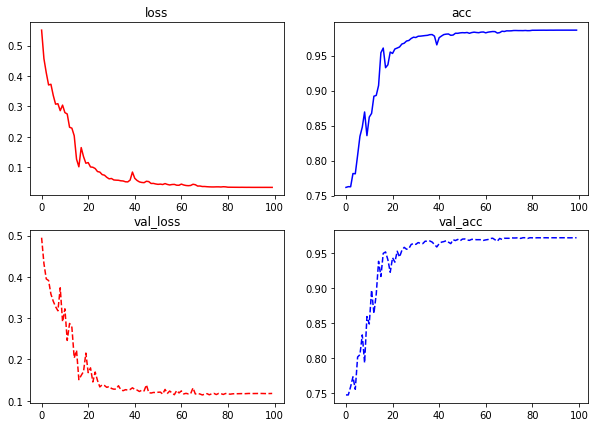

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

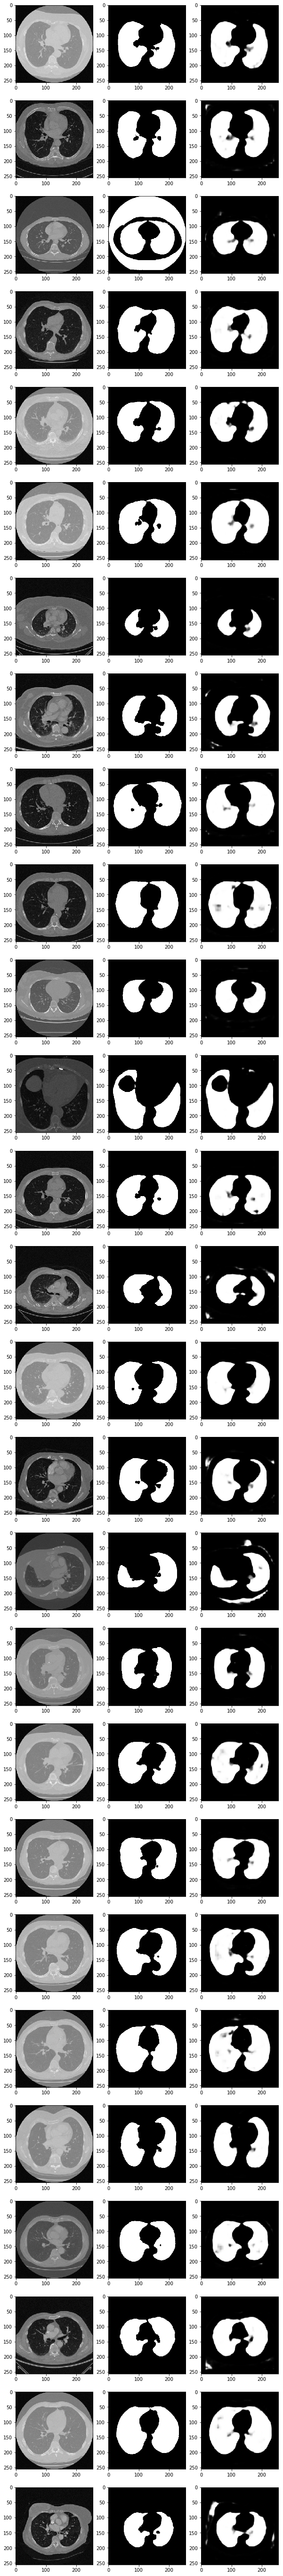

In [20]:
preds = model.predict(x_val)

fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')